In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv(r"c:\Users\claud\OneDrive\Escritorio\Ironhack\Labs\week 5\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [35]:
crosstab=pd.crosstab(df['category'],df['isBestSeller'])

In [36]:
crosstab['best_seller_ratio']=crosstab[True] / (crosstab[True] + crosstab[False])
crosstab.sort_values(by='best_seller_ratio', ascending=False).head(10)
#As we can see this are the top 10 categories with most prevalnt best seller

isBestSeller,False,True,best_seller_ratio
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


In [37]:
from scipy.stats import chi2_contingency
chi2, p, dof, _ = chi2_contingency(crosstab)

print(f"{chi2},{dof},{p}")
#chi2 represents the difference between your observed counts and the expected counts
#the higher this value, the stronger the evidence that they are not independent
#In this case, 36,684 is extremely large — much higher than typical critical values — which already suggests a strong association

#he p-value is 0.0 that means the probability of observing such a large χ² value by random chance is virtually nonexistent.

#Therefore, we reject the null hypothesis of independence.

#This result indicates a statistically significant association between category and best-seller status.
#In other words, being a best-seller is not equally likely across all product categories — some categories have a much higher proportion of best-sellers than others.

36684.23786636857,590,0.0


In [38]:
print(crosstab.dtypes)


isBestSeller
False                  int64
True                   int64
best_seller_ratio    float64
dtype: object


In [39]:

from scipy.stats.contingency import association

crosstab_counts = crosstab.drop(columns='best_seller_ratio')

crosstab_array = crosstab_counts.to_numpy(dtype=int)

cramers_v = association(crosstab_array, method="cramer")

print(f"Cramer's V: {cramers_v:.4f}")
#The calculated Cramér’s V of 0.1223 indicates a weak-to-moderate association between product category and best-seller status.
#Although the Chi-Square test (χ² = 36,684.24, p < 0.001) showed that this relationship is statistically significant, the relatively low Cramér’s V value suggests that the effect size is small.
#This means that while category has some influence on whether a product becomes a best-seller, other variables — such as price, brand reputation, or customer rating — likely play a much stronger role

Cramer's V: 0.1223


In [40]:
crosstab_prop = crosstab.drop(columns='best_seller_ratio').div(crosstab.drop(columns='best_seller_ratio').sum(axis=1), axis=0)

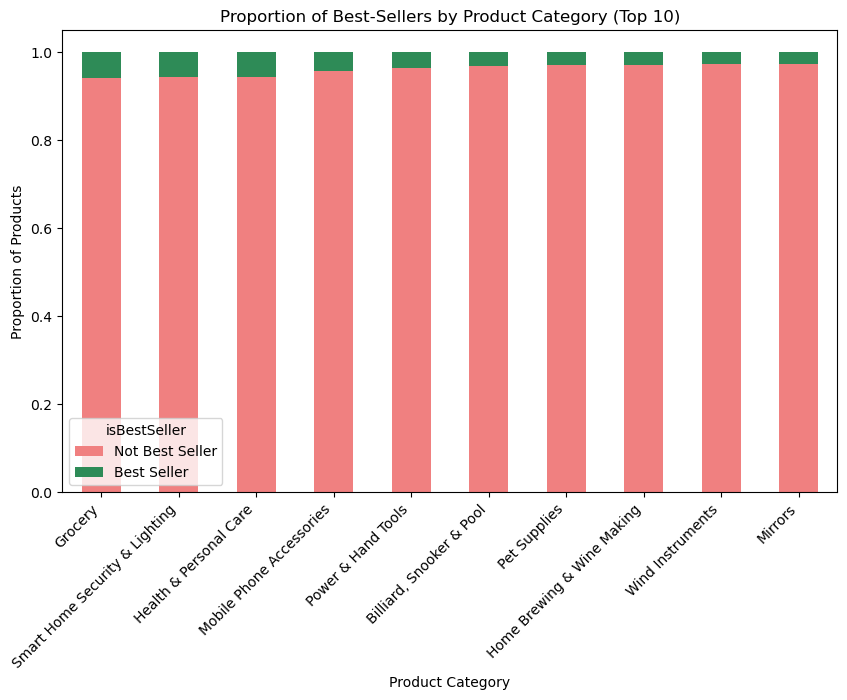

In [41]:
crosstab_prop.sort_values(by=True, ascending=False).head(10).plot(kind='bar',stacked=True,figsize=(10,6),color=['lightcoral', 'seagreen'])
plt.title('Proportion of Best-Sellers by Product Category (Top 10)')
plt.xlabel('Product Category')
plt.ylabel('Proportion of Products')
plt.legend(['Not Best Seller', 'Best Seller'], title='isBestSeller')
plt.xticks(rotation=45, ha='right')
plt.show()
#We did a stacked bar chart to see the relative proportions of best sellers and non best sellests accross the top 10 catetgories
#We can see we have a larger green segment, meaning a higher proportion of best sellers like Grocery an Smart home security 
#This confirms that being a best-seller is more prevalent in certain categories, which aligns with the earlier Chi-Square test results (p < 0.001, Cramér’s V = 0.12).

In [46]:
Q1= df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_price_normal=df[(df['price']>=lower_bound)&(df['price']<=upper_bound)]
df_price_normal

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


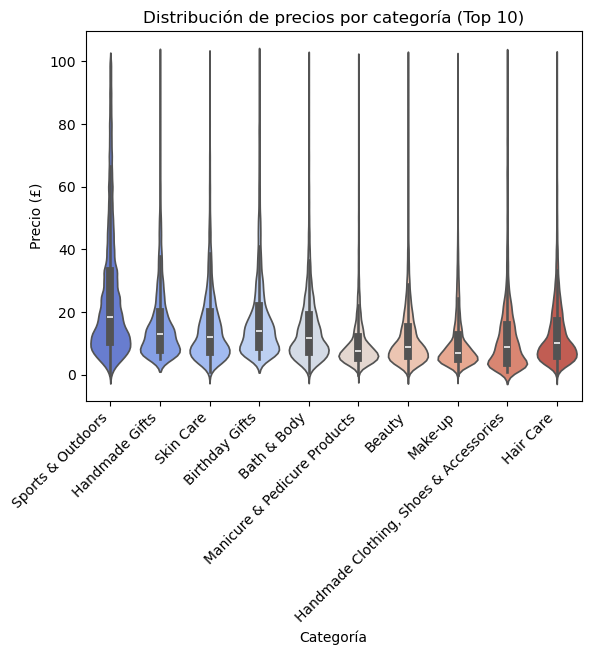

In [ ]:
top10 = df_price_normal['category'].value_counts().head(10).index

sns.violinplot(data=df_price_normal[df_price_normal['category'].isin(top10)], x='category', y='price', hue='category', palette="coolwarm",legend=False)
plt.title('Distribución de precios por categoría (Top 10)', fontsize=12)
plt.xlabel('Categoría')
plt.ylabel('Precio (£)')
plt.xticks(rotation=45, ha='right')
plt.show()
#Sports category with a great variety of prices 
#Handmade prices estables 
# Beauty the broad prices are low prices
# Clothing moderate level price variability 

C:\Users\claud\AppData\Local\Temp\ipykernel_32664\2237593493.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=avg_price_top10.values, y=avg_price_top10.index, palette="coolwarm")


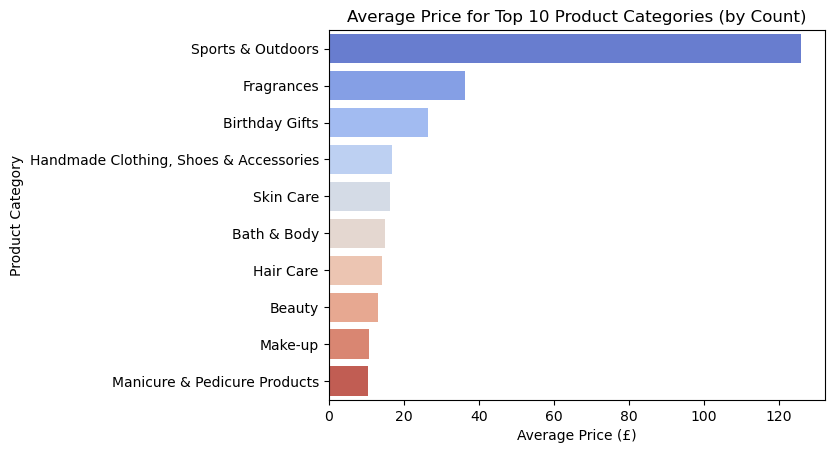

In [ ]:
top10_categories = df['category'].value_counts().head(10).index
avg_price_top10 = df[df['category'].isin(top10_categories)].groupby('category')['price'].mean().sort_values(ascending=False)



sns.barplot( x=avg_price_top10.values, y=avg_price_top10.index, palette="coolwarm")
plt.title('Average Price for Top 10 Product Categories (by Count)')
plt.xlabel('Average Price (£)')
plt.ylabel('Product Category')
plt.show()
#avg price in sports is 120 pounds products in this category are typically more expensive

C:\Users\claud\AppData\Local\Temp\ipykernel_32664\2320173554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x=avg_rating_top10.values, y=avg_rating_top10.index, palette="coolwarm")


<Axes: ylabel='category'>

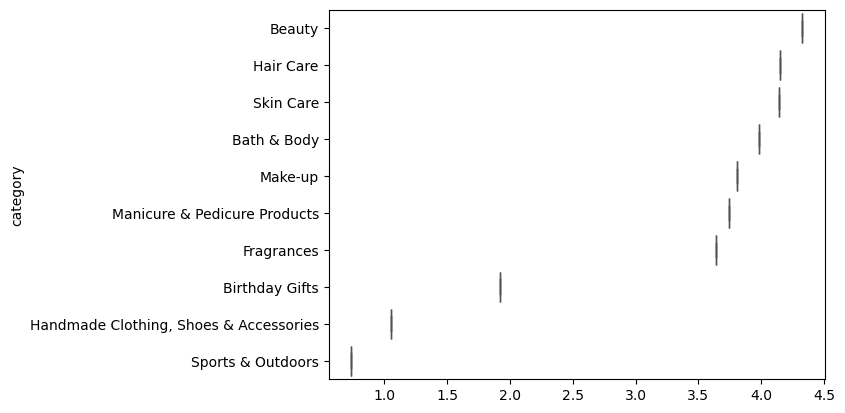

In [ ]:
top_10_cat=df['category'].value_counts().head(10).index
avg_rating_top10= df[df['category'].isin(top_10_cat)].groupby('category')['stars'].mean().sort_values(ascending=False)
sns.boxplot( x=avg_rating_top10.values, y=avg_rating_top10.index, palette="coolwarm")
#top 7 categories are rated in  more than 3.8
# Sports & Outdoors stands out with the lowest median rating, less than 1.0 star
# The category "Beauty" tends to receive the highest median rating,

In [ ]:
pearson=df['stars'].corr(df['price'])
pearson
#the correlat ion is really weak and negarive. as price increases, rating slightly decreases, almost negligible
#ustomers do not rate expensive products much worse or better — there’s almost no linear relationship.


np.float64(-0.12490673262159056)

In [ ]:
spearman=df['stars'].corr(df['price'],method='spearman')
spearman
##Higher-priced products are slightly more likely to receive lower ratings, but the trend is very weak.

#This may suggest that price is not a reliable predictor of satisfaction on Amazon UK

np.float64(-0.13316425462401277)

<Axes: xlabel='stars', ylabel='price'>

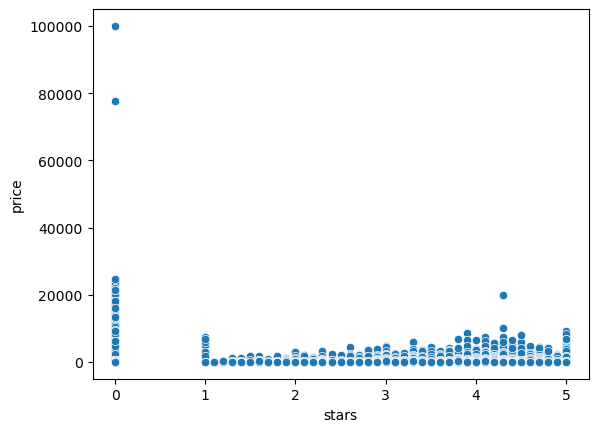

In [ ]:
sns.scatterplot(data=df, x='stars', y='price')
#there’s almost no relationship between how expensive a product is and how well it’s rated
# negative feedback happens at every price range.


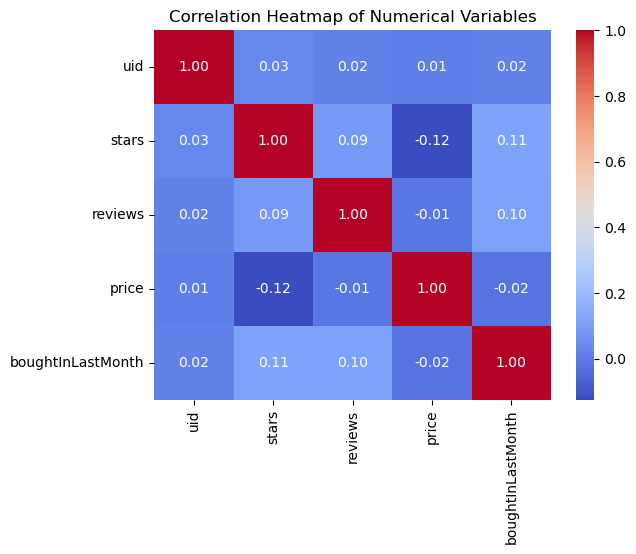

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr=numeric_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()
#Customer behavior isn’t strongly tied to product price
#Most variables are independent

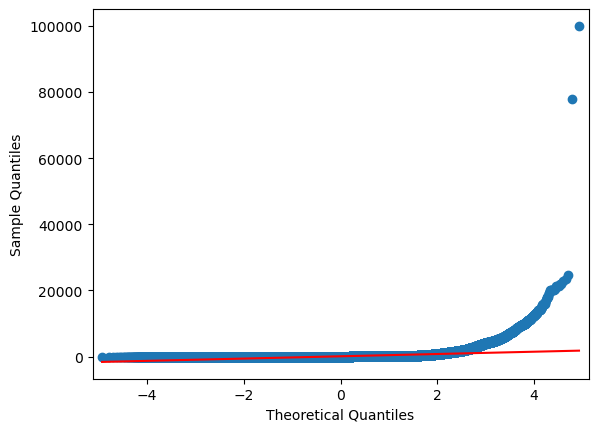

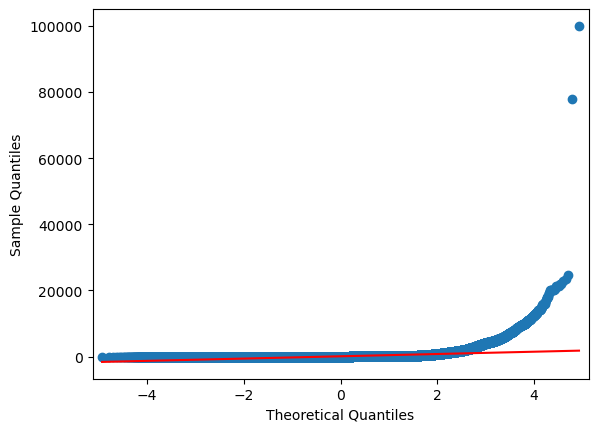

In [81]:
import statsmodels.api as sm

sm.qqplot(df['price'], line='s')